# Example 1
This notebook's cells will run a small-scale simulation of methdemon for a tumour evolving via gland fission and visualise the methylation arrays of a few of the glands.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Define relative paths to output files
outputs_path = 'outputs/'
methylation_file = 'output_methylation_arrays.dat'
demes_file = 'output_deme_methylation.dat'

In [ ]:
# Uncomment the below three lines and run if methdemon has not been compiled yet
# NOTE: Change the path to the include directory of your boost installation

#!cd ../../src
#!g++ -o methdemon methdemon.cpp -I/usr/local/include/ -lm  
#!cd ../examples/eg1

In [40]:
# Run the example simulation
!../../src/methdemon ./outputs configfile-eg1.dat

Done reading parameters
max_clones 100000; max_genotypes 8000000; max_driver_genotypes 399; max_demes 7225
dim_grid 85; matrix_max -1; max_distinct_allele_freqs 100000
max_clones_per_deme 154; max_bintree_clone_elements_per_deme 85
Assigned memory
dim_grid 85, max_demes 7225, num_demes = 1, init_diameter = 1
clone bintrees in use; max_pop 100000; max_genotypes 8000000
Initialised
################################################################
Seed = 10; K = 128
Migration type = 2, initial rate = 1.254784e-04, edge only = 1
Mut rates: 0.000010 (birth), 0.000000 (mig), 0.100000 (meth), 0.100000 (demeth)
Mut effects: 0.000000 (birth), 0.000000 (mig)
----------------------------------------------------------------
10 generations, 2347 iterations
11 cells, 5 clones, 5 genotypes, 1 driver genotypes
11 matrix columns; 21 genotypes ever created
1 demes (1 not empty), 1 bintree layers
----------------------------------------------------------------
Mean number of methylations, demethylations, 

In [15]:
# Read in the output files
methylation = pd.read_csv(outputs_path + methylation_file, sep='\t')
demes = pd.read_csv(outputs_path + demes_file, sep='\t')

In [47]:
# Separate the demes methylation array strings into lists of floats
deme_arrays = demes.AverageArray.apply(lambda x: [float(i) for i in x.split()])

Text(0.5, 1.0, 'Deme 538 methylation histogram')

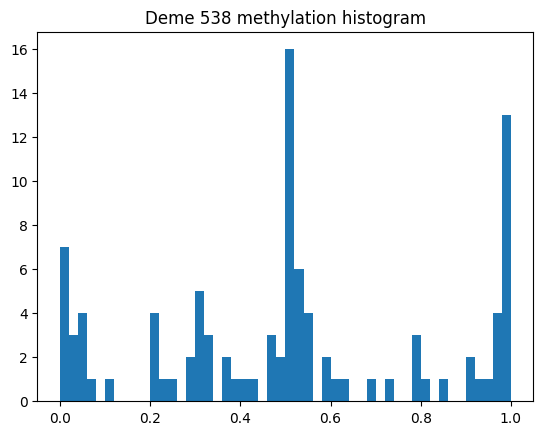

In [46]:
# Plot a randomly selected deme's methylation array
# Randomly select deme to plot
deme = np.random.randint(0, len(deme_arrays))
# Plot the deme's methylation histogram
plt.hist(deme_arrays[deme], bins=50)
plt.title('Deme ' + str(deme) + ' methylation histogram')